In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

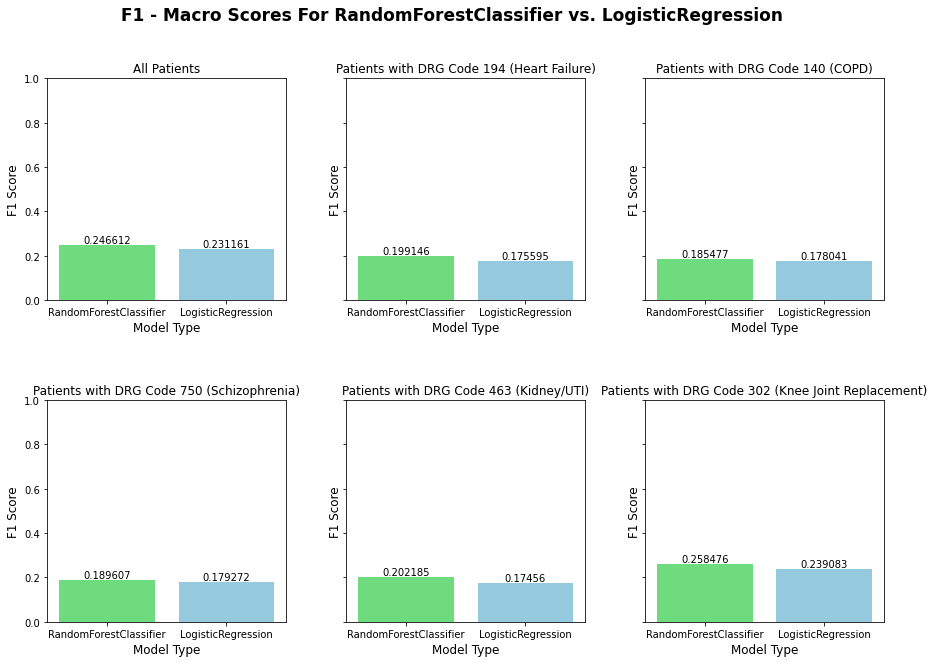

In [2]:
#Create visualization for each subpopulation for each model
import seaborn as sns

randomized_search_results = pd.read_csv('saved_scores_to_plot/randomized_search_results_final.csv')
fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharey=True)

fig.subplots_adjust(hspace=0.45, wspace=0.25)


fig.suptitle('F1 - Macro Scores For RandomForestClassifier vs. LogisticRegression', fontsize=17, weight='bold')

all_patients = randomized_search_results[randomized_search_results['subpopluation'] == 'all']
heart_patients = randomized_search_results[randomized_search_results['subpopluation'] == '194.0']
copd_patients = randomized_search_results[randomized_search_results['subpopluation'] == '140.0']
schizophrenia_patients = randomized_search_results[randomized_search_results['subpopluation'] == '750.0']
kidney_patients = randomized_search_results[randomized_search_results['subpopluation'] == '463.0']
knee_rep_patients = randomized_search_results[randomized_search_results['subpopluation'] == '302.0']

sns.barplot(ax=axes[0, 0], x=all_patients['model'], y=all_patients['best_scores'], palette=['#5CED73', 'skyblue'])
axes[0, 0].set_xlabel('Model Type', fontsize=12)
axes[0, 0].set_ylabel('F1 Score', fontsize=12)
axes[0, 0].bar_label(axes[0, 0].containers[0])
axes[0, 0].set_title('All Patients')

sns.barplot(ax=axes[0, 1], x=heart_patients['model'], y=heart_patients['best_scores'], palette=['#5CED73', 'skyblue'])
axes[0, 1].set_xlabel('Model Type', fontsize=12)
axes[0, 1].set_ylabel('F1 Score', fontsize=12)
axes[0, 1].bar_label(axes[0, 1].containers[0])
axes[0, 1].set_title('Patients with DRG Code 194 (Heart Failure)')

sns.barplot(ax=axes[0, 2], x=copd_patients['model'], y=copd_patients['best_scores'], palette=['#5CED73', 'skyblue'])
axes[0, 2].set_xlabel('Model Type', fontsize=12)
axes[0, 2].set_ylabel('F1 Score', fontsize=12)
axes[0, 2].bar_label(axes[0, 2].containers[0])
axes[0, 2].set_title('Patients with DRG Code 140 (COPD)')

sns.barplot(ax=axes[1, 0], x=schizophrenia_patients['model'], y=schizophrenia_patients['best_scores'], palette=['#5CED73', 'skyblue'])
axes[1, 0].set_xlabel('Model Type', fontsize=12)
axes[1, 0].set_ylabel('F1 Score', fontsize=12)
axes[1, 0].bar_label(axes[1, 0].containers[0])
axes[1, 0].set_title('Patients with DRG Code 750 (Schizophrenia)')

sns.barplot(ax=axes[1, 1], x=kidney_patients['model'], y=kidney_patients['best_scores'], palette=['#5CED73', 'skyblue'])
axes[1, 1].set_xlabel('Model Type', fontsize=12)
axes[1, 1].set_ylabel('F1 Score', fontsize=12)
axes[1, 1].bar_label(axes[1, 1].containers[0])
axes[1, 1].set_title('Patients with DRG Code 463 (Kidney/UTI)')

sns.barplot(ax=axes[1, 2], x=knee_rep_patients['model'], y=knee_rep_patients['best_scores'], palette=['#5CED73', 'skyblue'])
axes[1, 2].set_xlabel('Model Type', fontsize=12)
axes[1, 2].set_ylabel('F1 Score', fontsize=12)
axes[1, 2].bar_label(axes[1, 2].containers[0])
axes[1, 2].set_title('Patients with DRG Code 302 (Knee Joint Replacement)')

axes[1, 2].set_ylim(0, 1)
plt.savefig('F1_LR_RF_Comparison.png')

  Population                   Model  Accuracy  F1_Macro  F1_Weighted
0        All  RandomForestClassifier  0.629950  0.249865     0.655972
1      194.0  RandomForestClassifier  0.571776  0.190171     0.596669
2      140.0  RandomForestClassifier  0.562613  0.191782     0.594728
3      750.0  RandomForestClassifier  0.292454  0.187915     0.320295
4      463.0  RandomForestClassifier  0.654202  0.182035     0.684547
5      302.0  RandomForestClassifier  0.861982  0.250845     0.892211


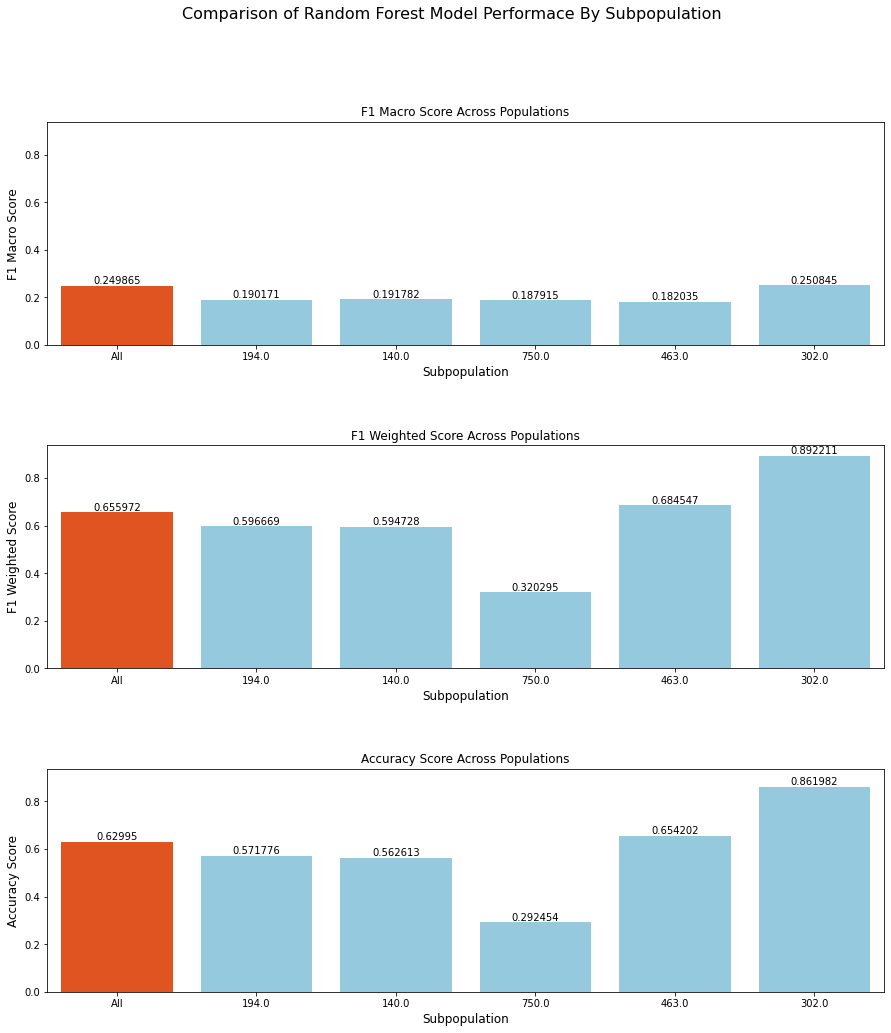

In [3]:
#Build visualization comparing random forest model performance of all populations
final_results_df = pd.read_csv('saved_scores_to_plot/final_rf_model_results.csv')
final_results_df.head(10)

final_results_df = final_results_df[0:6]
print(final_results_df)

colors = ['orangered' if (x == 'All') else 'skyblue' for x in final_results_df['Population'].values]

fig, axes = plt.subplots(3, 1, figsize=(15, 16), sharey=True)
fig.subplots_adjust(hspace=0.45, wspace=0.25)
fig.suptitle('Comparison of Random Forest Model Performace By Subpopulation', fontsize=16)

sns.barplot(ax=axes[0], x=final_results_df['Population'], y=final_results_df['F1_Macro'], palette=colors)
axes[0].set_xlabel('Subpopulation', fontsize=12)
axes[0].set_ylabel('F1 Macro Score', fontsize=12)
axes[0].bar_label(axes[0].containers[0])
axes[0].set_title('F1 Macro Score Across Populations')

sns.barplot(ax=axes[1], x=final_results_df['Population'], y=final_results_df['F1_Weighted'], palette=colors)
axes[1].set_xlabel('Subpopulation', fontsize=12)
axes[1].set_ylabel('F1 Weighted Score', fontsize=12)
axes[1].bar_label(axes[1].containers[0])
axes[1].set_title('F1 Weighted Score Across Populations')

sns.barplot(ax=axes[2], x=final_results_df['Population'], y=final_results_df['Accuracy'], palette=colors)
axes[2].set_xlabel('Subpopulation', fontsize=12)
axes[2].set_ylabel('Accuracy Score', fontsize=12)
axes[2].bar_label(axes[2].containers[0])
axes[2].set_title('Accuracy Score Across Populations')

plt.savefig('Model_Performance_By_Subpopulation.png')

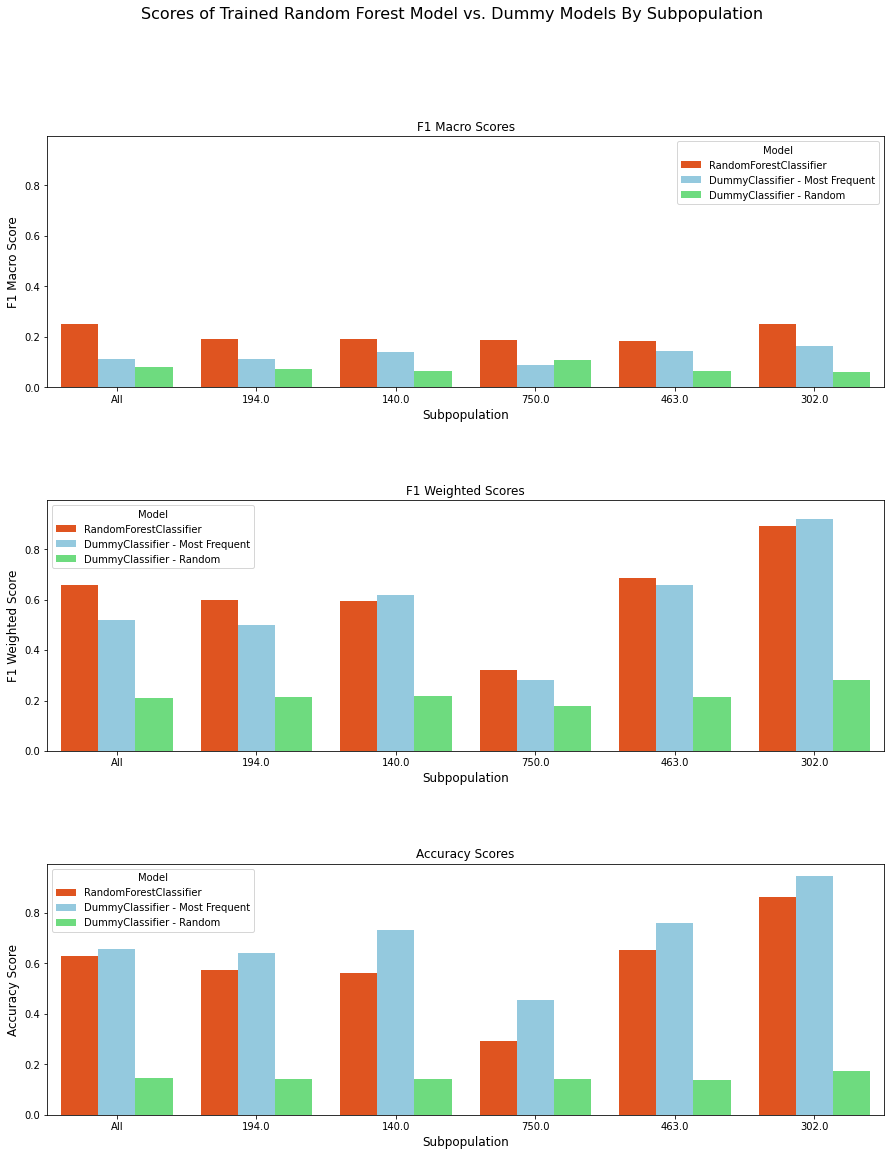

In [4]:
#Plot dummy classifiers vs rf model performance for each population
final_results_df = pd.read_csv('saved_scores_to_plot/final_rf_model_results.csv')

fig, axes = plt.subplots(3, 1, figsize=(15, 18), sharey=True)
fig.subplots_adjust(hspace=0.45, wspace=0.25)
fig.suptitle('Scores of Trained Random Forest Model vs. Dummy Models By Subpopulation', fontsize=16)

sns.barplot(ax=axes[0], data=final_results_df, x="Population", y="F1_Macro", hue="Model",palette= ['orangered', 'skyblue', '#5CED73'])
axes[0].set_xlabel('Subpopulation', fontsize=12)
axes[0].set_ylabel('F1 Macro Score', fontsize=12)
#axes[0].bar_label(axes[0].containers[0])
axes[0].set_title('F1 Macro Scores')

sns.barplot(ax=axes[1], data=final_results_df, x="Population", y="F1_Weighted", hue="Model",palette= ['orangered', 'skyblue', '#5CED73'])
axes[1].set_xlabel('Subpopulation', fontsize=12)
axes[1].set_ylabel('F1 Weighted Score', fontsize=12)
#axes[1].bar_label(axes[1].containers[0])
axes[1].set_title('F1 Weighted Scores')

sns.barplot(ax=axes[2], data=final_results_df, x="Population", y="Accuracy", hue="Model",palette= ['orangered', 'skyblue', '#5CED73'])
axes[2].set_xlabel('Subpopulation', fontsize=12)
axes[2].set_ylabel('Accuracy Score', fontsize=12)
#axes[2].bar_label(axes[2].containers[0])
axes[2].set_title('Accuracy Scores')

plt.savefig('RF_vs_Dummy.png')